<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Lesson + Lab)

***

Week 2 | Lesson 4.1-Alt

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Know what situations **grouping** is useful for
- Explain the **`.groupby()`** feature in Pandas
- Demonstrate aggregation /w plotting methods in Pandas

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Introduction](#introduction)   |   |
| 15 min  | [Demo /Guided Practice](#demo)  | Discuss Grouping |
| 30 min  | [Demo /Guided Practice](#demo)  | Demonstrate .groupby |
| 20 min  | [Demo /Guided Practice](#demo)  | Plotting with groups |
| 60+ min  | [Independent Practice](#ind-practice)  |   |
| 10 min  | [Conclusion](#conclusion)  |   |


<a name="introduction"></a>
## Introduction: Grouping (5 mins)

## What have you used grouping for (work, reactionally)?

## Generally:  Multi-Dimensional Data Analysis! 
   - Describe segments of your data based on unique values
   - Understand latent charactaristics of your data
       - Summary statistics of subsets
       - Discover patterns that exist in subsets
   - Finding duplicate values given specific variables
   - Apply aggregate functions to subsets, based on variable aspects of our datasets
   

## Specific Examples
 - Sum of crimes given time of day in SF (morning, afternoon, night)
 - Count numer of people with the same last name
 - Median number of multi-unit buildings in a region
 - Popularity of movie genres based on ticket sales
 - Segmenting customers based on age, buying habbits, interests, behavior
 - Using the "GROUP BY" clause in a database query using SQL (you will learn this soon!)

![](http://www.omnis.net/support/images/technews/g2msimplebargraph.jpg)

_Think about what this would look like as a summary statistic like mean or sum?_

![](http://stephanieevergreen.com/wp-content/uploads/2013/08/DivergingFinal.png)

_Summary grouped by question and response category_

![](http://zmjones.com/static/posts/titanic-survival-glm.png)

## A slight side-trip with [Simpsons Paradox](http://vudlab.com/simpsons/)

# Demo / Codealong - .groupby()

First, a sample dataset to get us thinking about grouping on a small scale dataset.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'a':np.random.randn(5),
                   'b':np.random.randn(5)})
df

,a,b,cat1,cat2
0,-0.542663,-0.550743,X,alpha
1,0.009898,1.330064,X,beta
2,0.934364,2.533304,Y,alpha
3,-0.277139,0.961263,Y,beta
4,0.252854,0.309987,Z,alpha


**This gives us a specific feature "a", grouped by cat1.** 

_Notice that groups don't really print anything interesting on their own._

In [11]:
group = df['a'].groupby(df['cat1'])
group

**Groups can be operated on in aggregate.**

In [9]:
# mean
group.mean()

cat1
X   -0.266383
Y    0.328612
Z    0.252854
Name: a, dtype: float64

In [97]:
# median
group.median()

cat1
X   -0.122978
Y    0.226079
Z    1.488806
Name: a, dtype: float64

In [98]:
# sum
group.sum()

cat1
X   -0.245956
Y    0.452158
Z    1.488806
Name: a, dtype: float64

**We can use group keys that are series as well**

For example:

In [12]:
#We'll make some arrays for use as keys
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

#Now using the data from dataset1, group the means by city and month
df['a'].groupby([cities,month]).mean()

LA  FEB    0.009898
    JAN    0.934364
NY  FEB   -0.277139
    JAN   -0.144905
Name: a, dtype: float64

This is an equivelent method for doing the same thing but you will find this to be much more common when dealing with DataFrames.

In [151]:
# adding cites and month to our DataFrame
df['cities'] = np.array(['NY','LA','LA','NY','NY'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])
df

,a,b,cat1,cat2,cities,month
0,-1.219253,1.173802,X,alpha,NY,JAN
1,-0.079585,1.284050,X,beta,LA,FEB
2,0.172046,0.339125,Y,alpha,LA,JAN
3,0.039341,-0.668502,Y,beta,NY,FEB
4,0.064998,2.219730,Z,alpha,NY,JAN


In [105]:
df.groupby(['cities', 'month'])['a'].mean()

cities  month
LA      FEB     -0.285096
        JAN      1.036064
NY      FEB     -0.583906
        JAN      0.763973
Name: a, dtype: float64

## For 1 minute:  Ask your group what would you expect to happen if you didn't specifiy a column / feature label?

In [106]:
# It looks nicer for 1 thing!
df.groupby(['cities', 'month']).mean()

a         b
cities month                    
LA     FEB   -0.285096 -0.471949
       JAN    1.036064  1.217602
NY     FEB   -0.583906  0.173575
       JAN    0.763973 -0.699796

Grouping by a single variable can be done by specifying a variable key string.

In [107]:
df.groupby('cities').mean()

,a,b
cities,,
LA,0.375484,0.372826
NY,0.314680,-0.408673


In [108]:
df.groupby('cities').count()

,a,b,cat1,cat2,month
cities,,,,,
LA,2,2,2,2,2
NY,3,3,3,3,3


## What's going on here!?

_(visually)_

![](http://www.w3resource.com/sql/sql-root-images/group-by.gif)

## 5 mins discuss with your group:  How might you use this in the future?

**Getting Subsets By Index**

Usually, we tell a DataFrame what we want by axis, to get a series.  with groups, we can still select columns, but the way we select subsets is a little different.  We must request them with a method for example:

In [17]:
# Re-init our test data
df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'a':np.random.randn(5),
                   'b':np.random.randn(5)})

df['cities'] = np.array(['NY','LA','LA','NY','NY'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])

df

,a,b,cat1,cat2,cities,month
0,-1.589376,0.209322,X,alpha,NY,JAN
1,0.971930,0.911365,X,beta,LA,FEB
2,-1.435360,-1.258352,Y,alpha,LA,JAN
3,-0.376070,0.268050,Y,beta,NY,FEB
4,-1.530704,-1.183770,Z,alpha,NY,JAN


In [18]:
# our group by values of cat2, inside of groups by cities
df.groupby(["cities", "cat2"]).size()

cities  cat2 
LA      alpha    1
        beta     1
NY      alpha    2
        beta     1
dtype: int64

In [19]:
# Fetching group subset pairs
my_group = df.groupby(["cities"])
for c in my_group.groups: 
    print c

NY
LA


In [61]:
# Say we want NY only from our subset
my_group.get_group('NY')

,a,b,cat1,cat2,cities,month
0,-1.589376,0.209322,X,alpha,NY,JAN
3,-0.376070,0.268050,Y,beta,NY,FEB
4,-1.530704,-1.183770,Z,alpha,NY,JAN


## 2-5 minutes try to do this with a partner:

 - Make a group object using citites and cat2
 - Select the cities subgroup "NY" with cat2 values "alpha"
 - Use get_group() on your group object, and pass a tuple with 2 values as the parameter
   - The first tuple element is the value you are looking for in "cities" index
   - The 2nd tuple element is the value you are looking for in "cat2"

In [82]:
dfn = df

In [83]:
dfn[(dfn['cities']=="NY") & (dfn['cat2'] == "alpha")]

,a,b,cat1,cat2,cities,month
0,-1.589376,0.209322,X,alpha,NY,JAN
4,-1.530704,-1.183770,Z,alpha,NY,JAN


In [84]:
my_df = df.groupby(['cities', 'cat2'])

my_df.get_group(('NY', 'alpha'))

,a,b,cat1,cat2,cities,month
0,-1.589376,0.209322,X,alpha,NY,JAN
4,-1.530704,-1.183770,Z,alpha,NY,JAN


## Explain what happened to me!?

More useful info about groups and selection in the [Pandas Cookbook docs](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)

A quick note about two popular aggregates that seem the same, but are not!

.count() vs .size()

In [109]:
# Gives us counts of record rows repeated over variable columns
df.groupby('cities').count()

,a,b,cat1,cat2,month
cities,,,,,
LA,2,2,2,2,2
NY,3,3,3,3,3


In [111]:
# .size gives us counts as series, not repeated values over column variables
df.groupby('cities').size()

cities
LA    2
NY    3
dtype: int64

With a Pandas **group object**, .count(), .size(), .sum(), .mean(), .std() are some very common ways to apply calcuation operations in aggregate to subsets of your data.

[Pandas .groupby docs](http://pandas.pydata.org/pandas-docs/version/0.15.2/groupby.html)


In [120]:
# Other group by methods include -- 
# sorry was too pressed for time to manually format this list

groupby_list = """
gb.filter  gb.get_group  gb.height  gb.last gb.median gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight
"""

cleaned_list = map(lambda item: item.replace("gb", "").strip(), groupby_list.split(".")[1:])
pd.DataFrame(cleaned_list, columns=[".groupby() aggregate functions"])

,.groupby() aggregate functions
0,filter
1,get_group
2,height
3,last
4,median
5,ngroups
6,plot
7,rank
8,std
9,transform


## 10 Minute Break!

# (basic) Plotting with Groups


In [128]:
# This is a reminder of what our dataframe looks like
df

,a,b,cat1,cat2,cities,month
0,0.039140,-0.414087,X,alpha,NY,JAN
1,-0.285096,-0.471949,X,beta,LA,FEB
2,1.036064,1.217602,Y,alpha,LA,JAN
3,-0.583906,0.173575,Y,beta,NY,FEB
4,1.488806,-0.985505,Z,alpha,NY,JAN


In [132]:
# We want to see the count of alpha + beta values, given cities
df.groupby("cities")['cat2'].count()

cities
LA    2
NY    3
Name: cat2, dtype: int64

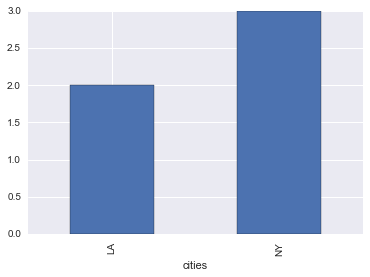

In [133]:
df.groupby("cities")['cat2'].count().plot(kind="bar")

## Show of hands -- who remembers how to groupby with more than one variable?

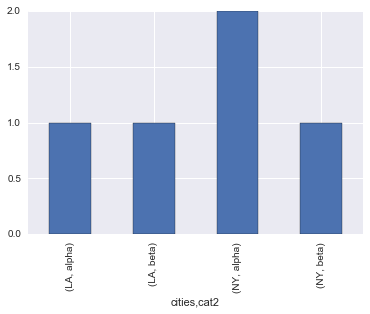

In [136]:
df.groupby(["cities","cat2"]).size().plot(kind="bar")

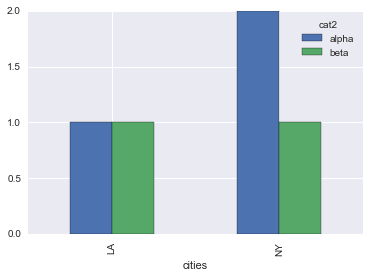

In [137]:
# Unstack will pull-apart group values for easy display
df.groupby(["cities","cat2"]).size().unstack().plot(kind="bar")

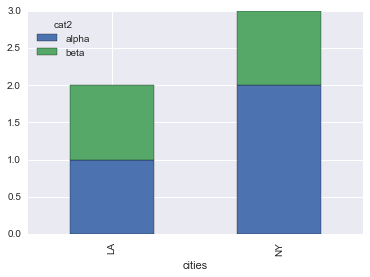

In [141]:
# Stacking isn't a bad choice for fewer categories but can look cluttery with lots of categories
df.groupby(["cities","cat2"]).size().unstack().plot(kind="bar", stacked=True)

Bar charts are great for displaying quanitites with groups and understanding qantity / size within subsets.  This is only an "introduction".  There are many ways to plot things.

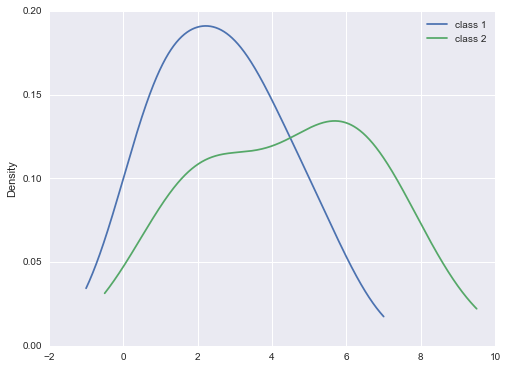

In [146]:
import matplotlib.pyplot as plt

classes = ["class 1"] * 5 + ["class 2"] * 5
vals = [1,3,5,1,3] + [2,6,7,5,2]
p_df = pd.DataFrame({"class": classes, "vals": vals})

fig, ax = plt.subplots(figsize=(8,6))
for label, df in p_df.groupby('class'):
    df.vals.plot(kind="kde", ax=ax, label=label)
plt.legend()

cities
LA    Axes(0.125,0.125;0.775x0.775)
NY    Axes(0.125,0.125;0.775x0.775)
dtype: object

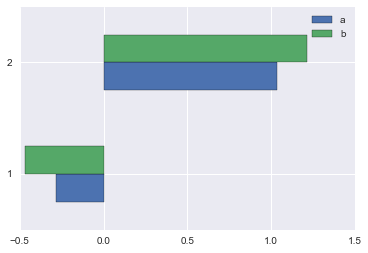

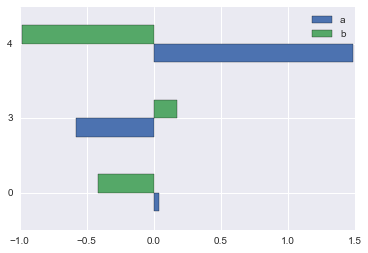

In [127]:
# This could be labled better but notice we can also plot negative values
df.groupby("cities").plot(kind="barh")

/Users/davidyerrington/virtualenvs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


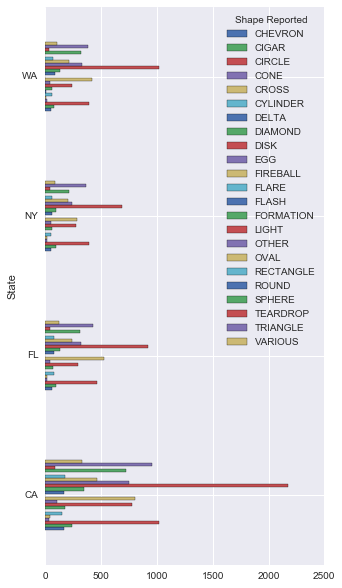

In [59]:
# Here's a plot I made with mysterious code!

## Group Exercize (~80mins-ish)

We are going to investigate the nuances of UFO sightings around the US.  By now you should be able to perform groupby operations in multiple dimensions and investigate the relationships between subsets of datasets with basic aggregation.

_Protip, to turn off slide type headers from every dataframe, go to "View" and select "None" from "Cell Toolbar"_

In [187]:
import pandas as pd, numpy as np, seaborn as sns

%matplotlib inline

In [188]:
# Load the UFO dataset!
# Did you know you can load csv over HTTP?  It's not ideal, but it can be done!
ufo = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_17/master/data/ufo.csv')

### 1. How many non-null values exist per each variable?

The first thing that is important to know is how complete our dataset is and how uniform are the values.

In [189]:
# Solution here

ufo.count()

City               80496
Colors Reported    17034
Shape Reported     72141
State              80543
Time               80543
dtype: int64

### 2. What is the breakdown of dtypes in our dataframe?

In [224]:
# Solution here
# ufo.info()
ufo.get_dtype_counts() # Tells counts of each type

object    5
dtype: int64

### 3. Provide a "Data Dictionary" that describes these features:

 - Variable / feature name
 - Brief description of what variable appears to represent
 - Expected dtype(s)
 - Number of unique values observed if categorical and < 20 unqiue 

_Please use "Markdown" tables to provide this info.  It's a good idea to get familliar with using markdown format when communicating your results.  Here's a primer on [markdown tables](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables).  No groaning allowed!_

## Change this cell to a "markdown" type cell
Name | Contains
--- | --- 
City| City the report was filed
Colors Reported | Color that was reported
Shape Reported | Shape that was reported
State | State the report was filed
Time | Time that the time was filed


### 3. Which colors are most commonly reported?
Provide a breakdown of colors by count.

In [232]:
# ufo.head()
# ufoc = ufo.groupby(["Colors Reported"]).count().sort_values('Time', ascending=False)
# ufoc.head(3)
# ufo.columns

# ufo['Colors Reported'].value_counts().head(10)

ufo.groupby('Colors Reported').size()

Colors Reported
BLUE                            1855
GREEN                           1897
GREEN BLUE                       147
ORANGE                          5216
ORANGE BLUE                       58
ORANGE GREEN                      66
ORANGE GREEN BLUE                 13
ORANGE YELLOW                    137
ORANGE YELLOW BLUE                 3
ORANGE YELLOW GREEN                5
ORANGE YELLOW GREEN BLUE           3
RED                             4809
RED BLUE                         445
RED GREEN                        469
RED GREEN BLUE                   166
RED ORANGE                       486
RED ORANGE BLUE                   21
RED ORANGE GREEN                  12
RED ORANGE GREEN BLUE              8
RED ORANGE YELLOW                 32
RED ORANGE YELLOW BLUE             2
RED ORANGE YELLOW GREEN            4
RED ORANGE YELLOW GREEN BLUE       2
RED YELLOW                       146
RED YELLOW BLUE                   36
RED YELLOW GREEN                  35
RED YELLOW GREEN BLUE 

### 4. Which shapes are most commonly reported?

In [242]:
ufosh = ufo.groupby(["Shape Reported"]).count().sort_values(['Time'], ascending=False)

ufosh.head(3)

,City,Colors Reported,State,Time
Shape Reported,,,,
LIGHT,16325,3727,16332,16332
TRIANGLE,7809,1360,7816,7816
CIRCLE,7720,2110,7725,7725


### 5. Are there any shapes that take on some colors more than others?
_* Warning: Use of broad langauge._

In [236]:
#ufo.groupby(["Shape Reported", "Colors Reported"]).count().sort_values(['Time'], ascending=False)

ufo.groupby(["Shape Reported", "Colors Reported"]).size()

Shape Reported  Colors Reported      
CHEVRON         BLUE                     19
                GREEN                    15
                GREEN BLUE                1
                ORANGE                   38
                ORANGE GREEN              1
                ORANGE YELLOW             3
                RED                      40
                RED BLUE                  3
                RED GREEN                 5
                RED ORANGE                2
                RED ORANGE GREEN          2
                RED YELLOW                3
                YELLOW                    6
CIGAR           BLUE                     38
                GREEN                    27
                GREEN BLUE                1
                ORANGE                   47
                ORANGE GREEN              2
                ORANGE GREEN BLUE         1
                ORANGE YELLOW             2
                ORANGE YELLOW BLUE        1
                RED                   

### 6. Display only the group for "CIGAR" using a bit mask.. 
Go ahead try it out.

In [194]:
# ufo[ufo['Shape Reported']=="CIGAR"]

ufo.groupby()

,City,Colors Reported,Shape Reported,State,Time
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
25,San Diego,NaN,CIGAR,CA,1/1/1944 12:00
32,Ft. Lee,NaN,CIGAR,VA,1/1/1945 12:00
74,Syracuse,NaN,CIGAR,NY,7/14/1947 10:30
88,Proctor,NaN,CIGAR,OK,8/15/1947 20:15
89,Whitmore Lake,NaN,CIGAR,MI,12/24/1947 21:00
105,Salem,NaN,CIGAR,OR,6/30/1949 21:00
117,Baltimore,NaN,CIGAR,MD,10/15/1949 20:00
138,Coeur d'Alene,ORANGE,CIGAR,ID,7/2/1950 13:00
149,Palm Springs,NaN,CIGAR,CA,1/20/1951 4:30


### 7. Return only the group for "VARIOUS" without using a bit mask..
It can be done and we're not just making this up!

In [ ]:
ufo.groupby("City").count().plot(kind="barh")

Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


In [245]:
#ufo_shape = ufo['Shape Reported'].value_counts()

# ufo['Shape Reported'].value_counts().plot(kind="bar")
#ufo_shape.plot(kind="bar")

ufo.groupby(['Shape Reported', 'State', 'Colors Reported']).size().plot(kind='barh')

KeyboardInterrupt: 

### 8. Plot the counts of shapes, states, colors
Double check our notebook and feel free to use Google for help.

### 9. Plot counts of sightings per City

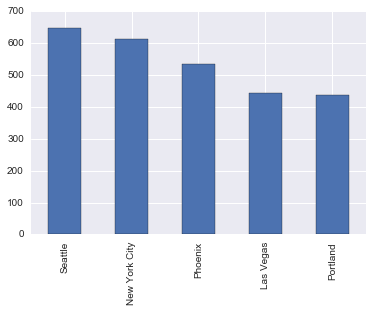

In [250]:
ufo['City'].value_counts().head(5).plot(kind='bar')

### 10.  Your co-worker in your data science team has approached you with some concerns..

<center>![a real data scientist](http://nerdist.com/wp-content/uploads/2016/02/20160225_becausescience_pokemon_1x1.jpg)
_* Actual data scientists may vary in appearance_
</center>


They tell you that group counting your sightings by city might be inaccurate.  How can you reassure them that your logic is sound and you are certianly correct?  Demonstrate to them, in any other way possible (with code) that you think counting groups by city is a good idea (right?).  Show them by using another method, or grouping in conjunction with other variables validates your assumptions.

In [253]:
# ufo.groupby(['State','City']).count()

ufo.groupby(['State','City']).plot

Colors Reported  \
State City                                                                  
AK    Adak                                                              0   
      Alaska                                                            0   
      Alaska cruise                                                     0   
      Anchor Point                                                      0   
      Anchorage                                                        25   
      Angoon                                                            0   
      Arctic                                                            0   
      Auke Bay                                                          2   
      Bering Sea                                                        1   
      Bethel                                                            3   
      Big Lake                                                          1   
      Butte                                                             0   
      Cantwell                                                          0   
      Chugiak                                                           0   
      Clam Gulch                                                        0   
      Cold Bay                                                          0   
      College Fjord                                                     0   
      Copper Center                                                     0   
      Cordova                                                           0   
      Council                                                           0   
      Craig                                                             1   
      Delta Junction                                                    2   
      Douglas Island                                                    0   
      Eagle River                                                       3   
      Eklutna                                                           0   
      Elk                                                               0   
      Elmendorf AFB                                                     1   
      Ester                                                             0   
      Fairbanks                                                        18   
      Fairbanks, Trans Alaskan Pipeline haul road 250...                0   
...                                                                   ...   
WY    Mills                                                             0   
      Old Faithful                                                      0   
      On highway; location unknown                                      0   
      Opal                                                              0   
      Pine Haven                                                        0   
      Pinedale                                                          0   
      Point of Rocks                                                    1   
      Powell                                                            0   
      Rawlins                                                           1   
      Riverton                                                          0   
      Rock River                                                        0   
      Rock Spings, 2miles west of                                       0   
      Rock Springs                                                      5   
      Seminoe Lake                                                      0   
      Shawnee                                                           0   
      Sheridan                                                          1   
      Shirley Basin Road                                                0   
      Ten Sleep                                                         0   
      Teton National Park                                               0   
      Thermopolis                                     

### 11.  Which cities have the most "CIGAR" sightings?

In [261]:
cigar_df = ufo[ufo["Shape Reported"]== "CIGAR"] 

cigar_df.groupby('City').size().order(ascending=False).head(1)
# ufo.groupby(['City', 'Shape Reported']).size()

/Users/sebozek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


City
New York City    19
dtype: int64

---

Ask instructors for help on everything previous to this point, but we have designed the bonus material around collaboration in mind.  The next few problems are to be completed without instructor help.

```
if lab_question > 11:
    no_instructors_allowed()
```

### 12.  Bonus:  Display only top 20 shape counts reported by state!

This is a weird problem yes?  You're going to have weird questions and google is your friend!  So for this problem, we have found the answer with the search term "pandas top 10 by group" is a semi-obvious place where you will find many of these types of answers.

You will easily find the answer but you will need to think about how to implement the solution as the ones you find won't be copy and paste but should demonstrate the intuition for doing so using a grouby object.

This is the expected output, _using a groupby() and [some method(s)] to display "State" and "Shape" as your group indexes with a count!_:

```
State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64
```

In [267]:
ufo.groupby(['State','Shape Reported']).size().nlargest(20)

State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64

### 13.  Bonus:  What are the top 20 shapes by City + State?


In [268]:
ufo.groupby(['City','State','Shape Reported']).size().nlargest(20)

City           State  Shape Reported
Seattle        WA     LIGHT             129
New York City  NY     LIGHT             105
Phoenix        AZ     LIGHT             105
San Diego      CA     LIGHT              94
Portland       OR     LIGHT              88
Las Vegas      NV     LIGHT              84
Los Angeles    CA     LIGHT              72
Myrtle Beach   SC     LIGHT              64
Houston        TX     LIGHT              63
New York City  NY     DISK               63
Tinley Park    IL     LIGHT              60
Tucson         AZ     LIGHT              58
New York City  NY     CIRCLE             56
Orlando        FL     LIGHT              55
Seattle        WA     FIREBALL           55
Miami          FL     LIGHT              53
New York City  NY     SPHERE             51
Seattle        WA     OTHER              51
                      CIRCLE             50
Albuquerque    NM     LIGHT              48
dtype: int64

### 14. Bonus: What hours of the day are sightings most commonly reported?

To solve this problem, you will need to follow these steps:
    - Convert time feature to datetime type
    - Create a new feature based on a characteristic of the first step
    - Check our Slack for how to accomplish this (dyerrington posted this recently) 
    
There are at least 3 students who have asked how to do this out of personal interest in our class.  Your mission is to seek them out for advice.  No instructors allowed!

In [272]:
#ufo['Time'].dtype # Object

ufo['Date'] = pd.to_datetime(ufo['Time'])

ufo

,City,Colors Reported,Shape Reported,State,Time,Date
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,1933-04-18 19:00:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30,1934-09-15 15:30:00
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00,1935-06-15 00:00:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00,1936-07-15 00:00:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00,1936-10-15 17:00:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00,1937-06-15 00:00:00


In [280]:
# ufo.get_dtype_counts()
# ufo.info()

ufo['Hour'] = ufo['Date'].map(lambda date: date.hour)

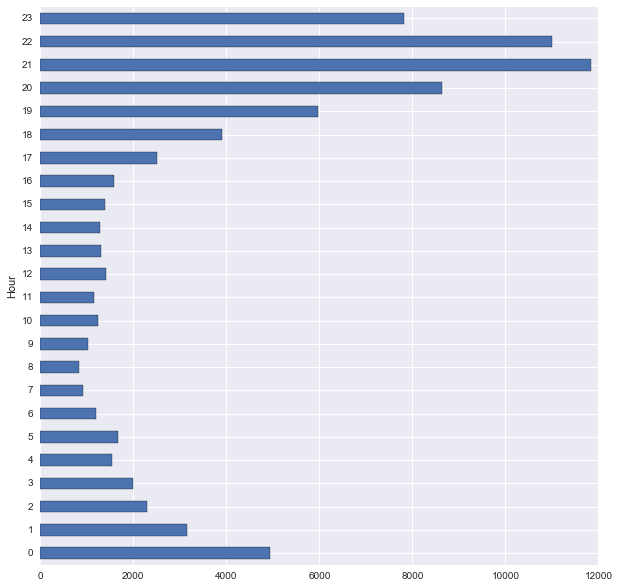

In [286]:
ufo.groupby('Hour').size().plot(kind='barh', figsize=(10,10))

### 15. BONUS BONUS:  Generally, what interesting insights can you share about our UFO dataset?
    
Be as detailed as possible and tell us a nice story (long or short), about your observations.  Great ideas are:
 - Summary statistics
 - Outliers
 - Patterns
 - Latent characteristics
 - Graphs / plots / ascii art